In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import os
import json
from itertools import permutations
from sklearn.decomposition import PCA

np.random.seed(42)

%matplotlib inline

In [3]:
# Set data input folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [46]:
# Load CORUM data
CORUM_data = pd.read_csv('../common_files/CORUM_humanComplexes.txt',sep = '\t')

# Load STRING data
STRING_data = pd.read_csv('../common_files/STRING_data.csv.gz')

# load gene level profiles 
df_gene = pd.read_csv(os.path.join(output_folder,'20240202_6W_CP498_SABER_Pilot_HeLa_guide_normalized_merged_feature_select_median_ALLWELLS_cp_gene_aggregated.csv.gz')).set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# load hit lists 
whole_cell_hits = pd.read_csv(os.path.join(output_folder,'HeLa_CP_plate_level_median_per_feat_sig_genes_5_FDR_whole_cell_hits.csv')).set_index('Gene')
comp_spec_hits = pd.read_csv(os.path.join(output_folder,'HeLa_CP_plate_level_median_per_feat_sig_genes_5_FDR_compartment_specific_hits.csv')).set_index('Gene')
hit_list = list(comp_spec_hits.index) + list(whole_cell_hits.index)
df_hits = df_gene.loc[df_gene.index.isin(hit_list)]
df_hits

,Cells_AreaShape_BoundingBoxMinimum_X,Cells_AreaShape_BoundingBoxMinimum_Y,Cells_AreaShape_CentralMoment_0_1,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_1_3,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,...,Nuclei_Texture_InfoMeas1_Mito_5_01_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_WGA_10_00_256,Nuclei_Texture_InfoMeas1_WGA_5_00_256,Nuclei_Texture_InfoMeas1_WGA_5_02_256,Nuclei_Texture_InfoMeas2_DAPI_Painting_10_03_256,Nuclei_Texture_InfoMeas2_Mito_5_02_256,Nuclei_Texture_InfoMeas2_Phalloidin_5_00_256,Nuclei_Texture_SumAverage_DAPI_Painting_10_03_256,Nuclei_Texture_SumVariance_Mito_10_03_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCF1,0.092828,-0.107890,-0.293748,0.013546,0.638083,0.128420,0.342283,0.084012,0.327259,0.020045,...,0.332442,0.057782,-0.071093,0.625910,0.399545,0.451017,-0.211536,-0.438638,0.729287,-0.168835
ABLIM1,-0.519953,-0.129889,-0.012320,-0.087000,-0.380626,0.022408,0.246733,0.280668,0.111228,-0.178147,...,0.282031,0.332764,0.387855,0.181622,0.457557,-0.097507,-0.494330,-0.321885,-0.108028,-0.357175
ACTR2,-0.386785,-0.077710,0.250678,0.199732,-0.305995,0.018617,-0.034243,-0.185803,-0.057922,-2.475200,...,-4.037900,-3.770800,-3.901150,-3.308883,-3.001425,1.984550,3.601450,3.625200,2.647350,5.168875
ACTR3,0.047993,0.150558,-0.207851,-0.059526,0.180092,-0.012323,-0.070125,-0.081037,-0.064024,-1.476927,...,-2.374500,-2.479875,-2.695650,-1.862500,-1.527775,1.750550,2.177125,2.326900,1.862025,2.108350
ADAR,-0.279509,0.161750,-0.099987,0.157556,0.334295,-0.005101,-0.091293,0.016147,-0.099664,-0.364783,...,-0.186790,0.101070,0.255692,0.347048,0.193837,0.024498,-0.209405,-0.360370,-0.202123,-0.131198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YWHAH,0.210793,0.349680,0.139362,0.025004,-0.092254,0.019237,-0.072772,-0.088421,-0.066950,-0.136100,...,0.271065,0.232745,0.147512,0.086491,0.151973,0.146970,0.001228,-0.093272,0.043539,-0.331310
ZC3H8,-0.137352,0.193908,-0.244450,-0.686640,-0.759112,-0.599270,-0.033973,0.236305,0.258515,0.010340,...,0.127796,0.142740,0.290227,0.246103,-0.548530,-0.851331,0.301071,-0.236650,-0.124658,0.080595
ZC3HC1,0.363362,-0.215524,0.066072,-0.010882,-0.295125,0.204570,0.072979,0.006168,-0.261937,0.279832,...,0.327375,0.409795,0.397515,0.394945,0.300020,-0.232425,-0.167300,-0.301932,-0.268201,-0.067046


In [35]:
# Perform principal component analysis on hit list
pca = PCA()
pca.fit(df_hits)
x = list(pca.explained_variance_ratio_)
# Find principal component that represents 90% variation
PCA_lookup = {}
for i in range(len(x)):
    distance = abs(.9-sum(x[:i+1]))
    PCA_lookup[distance] = i 
component = PCA_lookup[min(PCA_lookup.keys())]+1
print (f'Principal component representing closest to 90% variation is {component}')
# Perform principal component analysis and select components representing 90% of variation in data
pca = PCA(n_components=component)
df_hits_pca = pd.DataFrame(pca.fit_transform(df_hits),index=df_hits.index)
df_hits_pca.head()

Principal component representing closest to 90% variation is 27


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCF1,-5.421277,-5.605510,6.358024,-0.976402,0.848076,0.147434,6.548967,-4.917980,-0.026263,-1.787917,...,-0.922127,-1.069869,0.936133,-1.541111,-0.050837,-0.857466,-0.076639,0.908951,-0.022081,-0.173480
ABLIM1,-3.129874,-1.370974,-5.471434,-0.109958,-1.600636,-1.479784,-0.107285,-0.046910,0.424281,0.503464,...,-1.740294,0.512702,0.416721,0.109722,-0.634653,-0.134688,0.099163,0.497993,-0.847585,-0.084652
ACTR2,48.981510,21.573034,-7.987782,2.085429,-4.253400,-0.365221,0.114263,-0.933832,-2.241335,-0.405357,...,-1.112636,-0.801132,-3.225201,-0.517588,0.219849,-0.575173,-0.142428,1.868881,0.825322,-0.685130
ACTR3,35.657434,15.231652,-18.922905,2.951564,3.278879,1.213333,-1.418028,-1.125507,-0.695041,-2.156062,...,-0.642200,0.799907,0.182860,0.157779,-0.737474,0.497498,-0.756281,-1.081684,0.362116,-0.604392
ADAR,-0.514118,-2.159713,-5.468409,0.118378,0.826674,-1.370230,-0.943428,-1.003784,-0.852951,-1.226383,...,-1.154235,-0.177685,0.108506,0.617519,-0.154354,1.034121,0.090870,-0.446945,0.053784,0.082111


In [36]:
# Calculate correlation between all gene pairs and create a dictionary of gene pairs/correlation
df_hits_corr = df_hits_pca.T.corr()
genes = list(df_hits_corr.index)
corr_dic = {}
for gene1 in genes:
    for gene2 in genes:
        if len(frozenset([gene1,gene2])) == 1 :
            continue
        else:    
            corr_dic[frozenset([gene1,gene2])]=(df_hits_corr.loc[gene1,gene2])
        
print(f'Gene pair correlation dictionary contains {len(corr_dic)} entries')

Gene pair correlation dictionary contains 80200 entries


In [37]:
# Create a list of protein clusters with all complexes that had at least 66% of genes represented within the A549 WGS hits
cluster_count = 0
hit_cluster_list_list = []
hit_set = set()
for i in range(len(CORUM_data)):
    cluster = CORUM_data.iloc[i]['subunits(Gene name)'].split(';')
    count = 0
    hit_cluster_list = []
    for g in cluster:
        if g in genes:
            count += 1
            hit_set.add(g)
            hit_cluster_list.append(g)
    if (count/len(cluster)) > 0.333:
        cluster_count += 1
    if hit_cluster_list and (count/len(cluster)) > 0.333:
        hit_cluster_list_list.append(hit_cluster_list)
print(f'There are {len(hit_set)} unique genes within the cluster')
print(f'There are {cluster_count} clusters within the hit genes with at least 1/3 overlap with a CORUM cluster')
print(f'There are {len(hit_cluster_list_list)} duplicates within the list')

There are 260 unique genes within the cluster
There are 330 clusters within the hit genes with at least 1/3 overlap with a CORUM cluster
There are 330 duplicates within the list


In [38]:
# Assign correlations to hit gene pairs
hit_pair_set = set()
for l in hit_cluster_list_list:
    for c in list(permutations(l,2)):
        hit_pair_set.add(frozenset(c))

hit_corr_dic = {}
for s in hit_pair_set:
    if len(s) != 1:
        hit_corr_dic[s] = corr_dic[s]

print(f'There are {len(hit_pair_set)} hit pairs.')
print(f'There are {len(hit_corr_dic)} hit pairs with correlation.')

There are 152 hit pairs.
There are 152 hit pairs with correlation.


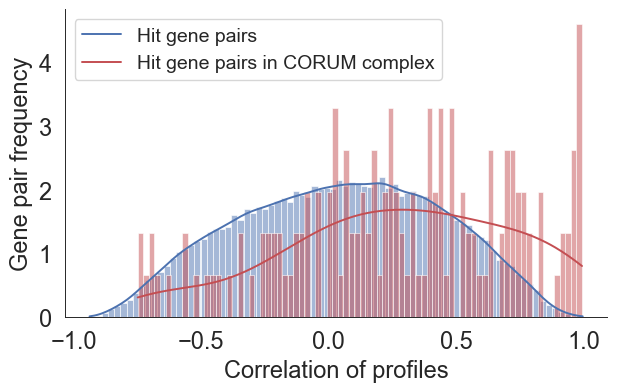

In [45]:
# Plot CORUM gene pair correlation distribution
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7,'xtick.labelsize':17,'ytick.labelsize':17})

fig, ax = plt.subplots(figsize=(7,4))
a = list(corr_dic.values())
b = list(hit_corr_dic.values())

sns.histplot(a ,color='b' ,stat= 'percent' ,bins= 80, kde=True, line_kws={'lw':1.4} , alpha=0.5,ax = ax);
sns.histplot(b ,color='r' ,stat= 'percent' ,bins= 80, kde=True, line_kws={'lw':1.4} ,alpha=0.5,ax = ax);

ax.set_ylabel('Gene pair frequency',size=17)
ax.set_xlabel('Correlation of profiles',size=17)
font = font_manager.FontProperties(size=14)
ax.legend(['Hit gene pairs','Hit gene pairs in CORUM complex'],loc='upper left',prop=font )
sns.despine(top = True)

#fig.savefig(os.path.join(output_folder,'figure_panels','Fig4C_A549_CORUM_gene_pair_correlation_distribution.png'), dpi=300,facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [47]:
# Calculate the median values for correlations for background gene pairs and gene pairs in CORUM clusters 
print("Background gene pair profile correlation median",np.median(list(corr_dic.values())))
print("Gene pairs in CORUM clusters profile correlation median",np.median(list(hit_corr_dic.values())))

Background gene pair profile correlation median 0.054627818925608765
Gene pairs in CORUM clusters profile correlation median 0.28390285670652615


In [48]:
# Subset the STRING predicted protein links to  hits
STRING_data_hits = STRING_data[STRING_data['protein1'].isin(genes) & STRING_data['protein2'].isin(genes)]
print(f'Full PPI database is {len(STRING_data)} entries')
print(f'PPI database subsetted to hits is {len(STRING_data_hits)} entries')
corr_min = min(corr_dic.values())
corr_max = max(corr_dic.values())   
print(f'Minimum correlation is {corr_min}')
print(f'Maximum correlation is {corr_max}')

Full PPI database is 11938498 entries
PPI database subsetted to hits is 24728 entries
Minimum correlation is -0.9368847834589761
Maximum correlation is 0.9946953805859823


In [49]:
# Bin the correlations into 8 categories 
results = STRING_data_hits.copy(deep=True).reset_index(drop=True)

bins = [-1,-0.66,-0.33,0,0.33,0.66,1]
for i in range(len(results)):
    gene1 = results.iloc[i]['protein1']
    gene2 = results.iloc[i]['protein2']
    corr_value = corr_dic[frozenset([gene1,gene2])]
    results.at[i , 'correlation'] = corr_value
    if corr_value > bins[5]:
        results.at[i , 'correlation_bin'] = f'{bins[5]} to {bins[6]}'
    elif corr_value > bins[4] and corr_value <= bins[5]:
        results.at[i , 'correlation_bin'] = f'{bins[4]} to {bins[5]}'
    elif corr_value > bins[3] and corr_value <= bins[4]:
        results.at[i , 'correlation_bin'] = f'{bins[3]} to {bins[4]}'
    elif corr_value > bins[2] and corr_value <= bins[3]:
        results.at[i , 'correlation_bin'] = f'{bins[2]} to {bins[3]}'
    elif corr_value > bins[1] and corr_value <= bins[2]:
        results.at[i , 'correlation_bin'] = f'{bins[1]} to {bins[2]}'
    elif corr_value <= bins[1]:
        results.at[i , 'correlation_bin'] = f'{bins[0]} to {bins[1]}'
results.head()

,protein1,protein2,combined_score,correlation,correlation_bin
0,M6PR,TMED2,176,-0.591213,-0.66 to -0.33
1,M6PR,ARF4,169,-0.864005,-1 to -0.66
2,M6PR,MTOR,174,0.307922,0 to 0.33
3,M6PR,PACS2,539,0.853771,0.66 to 1
4,M6PR,MCOLN1,240,0.773339,0.66 to 1


/var/folders/pm/r5xv70_14yx_b9gflxr4xck40000gp/T/ipykernel_31689/4090515018.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(float(label))) for label in labels], size=16)


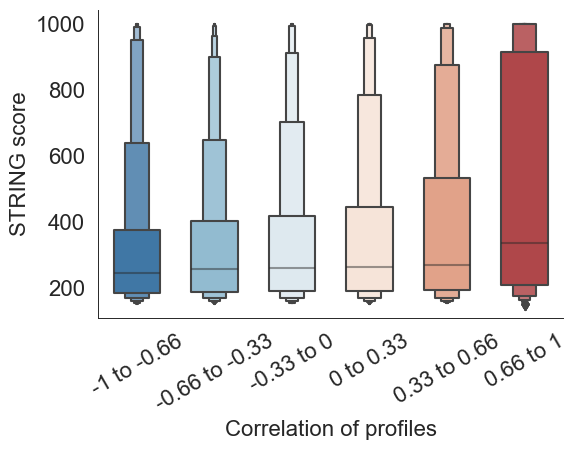

In [50]:
# Plot STRING score x gene pair correlation
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7})

fig, ax = plt.subplots(figsize=(6,4))
order = [f'{bins[0]} to {bins[1]}',f'{bins[1]} to {bins[2]}',f'{bins[2]} to {bins[3]}',f'{bins[3]} to {bins[4]}',f'{bins[4]} to {bins[5]}',f'{bins[5]} to {bins[6]}']

flierprops = dict(markerfacecolor='white', markersize=0.1, linestyle='none')
sns.boxenplot(data=results,
            x = 'correlation_bin',
            y = 'combined_score',
            order=order, 
            width = 0.6,
            palette = 'RdBu_r',
            ax=ax)

ax.set_xlabel('Correlation of profiles',size=16)
ax.set_ylabel('STRING score',size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
labels = [item for item in ax.get_yticks()]
ax.set_yticklabels([str(round(float(label))) for label in labels], size=16)
ax.set_xticklabels(order, size=16,rotation=30)
sns.despine(top = True,left=False,bottom=False)

#fig.savefig(os.path.join(output_folder,'figure_panels','Fig4D_A549_STRING_gene_pair_correlation_score.png'), 
 #           dpi=300,
  #          facecolor='w', 
   #         edgecolor='w', 
    #        bbox_inches='tight')
plt.show()
